In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../dados/iris.csv')
df.head()

,comprimento_sépala,largura_sépala,comprimento_pétala,largura_pétala,espécie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Aula 04
## Visualizando dados diferentes

In [83]:
df.espécie.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

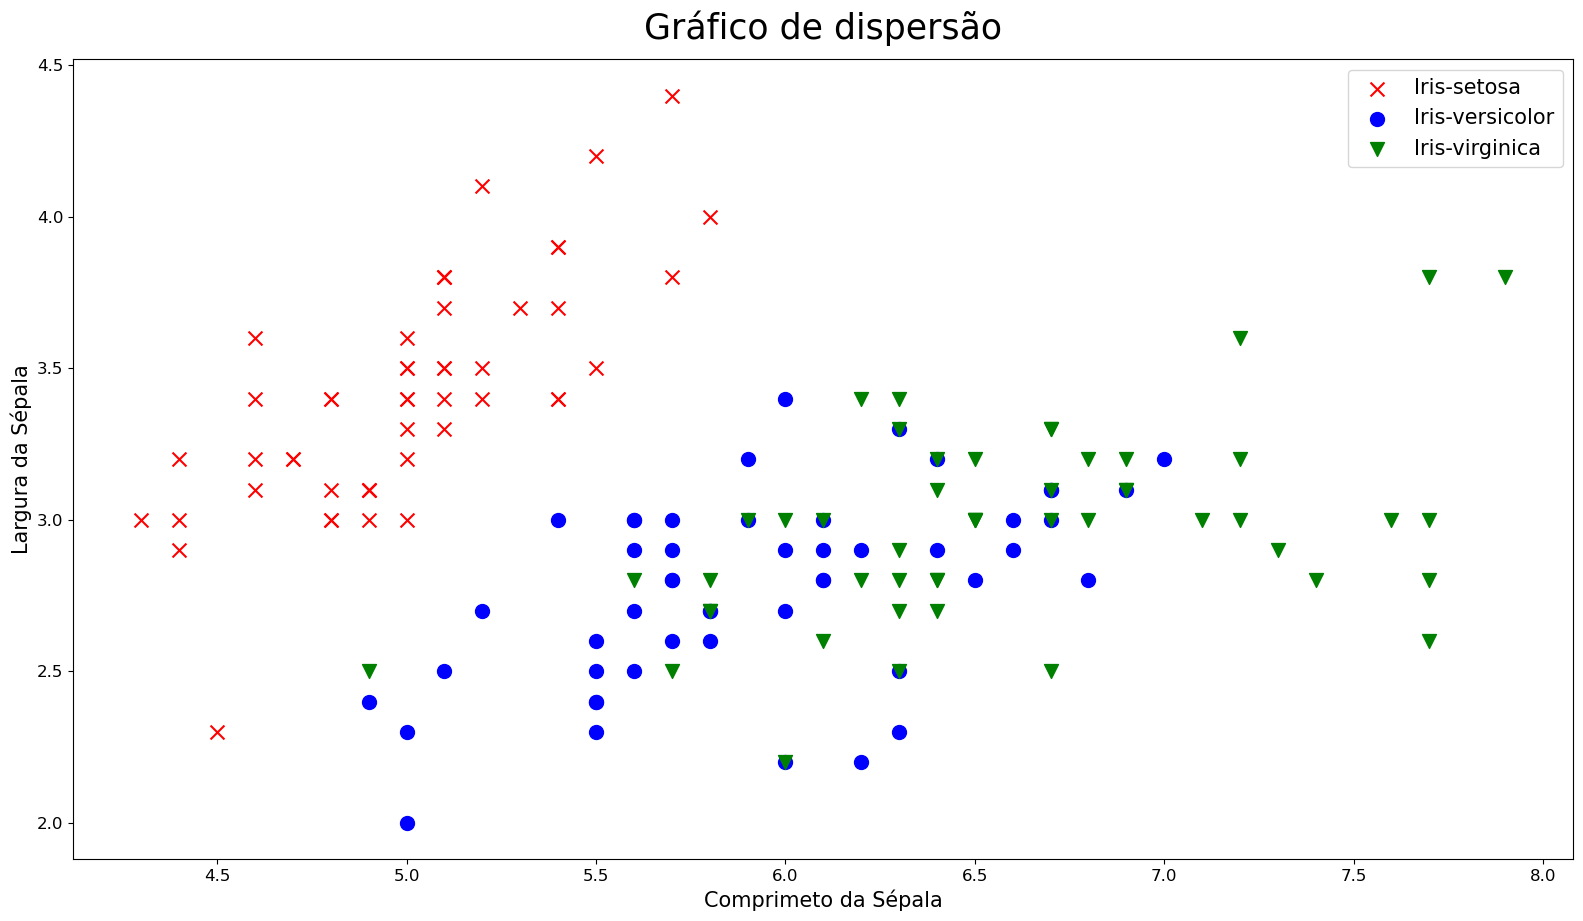

In [84]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

# scatter plot
cores = {'Iris-setosa': 'r', 'Iris-versicolor': 'b', 'Iris-virginica': 'g'}
marcadores = {'Iris-setosa': 'x', 'Iris-versicolor': 'o', 'Iris-virginica': 'v'}

for especie in df.espécie.unique():
    tmp = df[df.espécie == especie]
    eixo.scatter(tmp.comprimento_sépala, tmp.largura_sépala,
                 color=cores[especie],  # cores
                 marker=marcadores[especie],  # marcadores
                 s=100) # tamanho
                
eixo.set_title('Gráfico de dispersão', fontsize=25, pad=15)
eixo.set_xlabel('Comprimeto da Sépala', fontsize=15)
eixo.set_ylabel('Largura da Sépala', fontsize=15)
eixo.tick_params(labelsize=12)
eixo.legend(cores, fontsize=15)

# Distribuição dos Dados

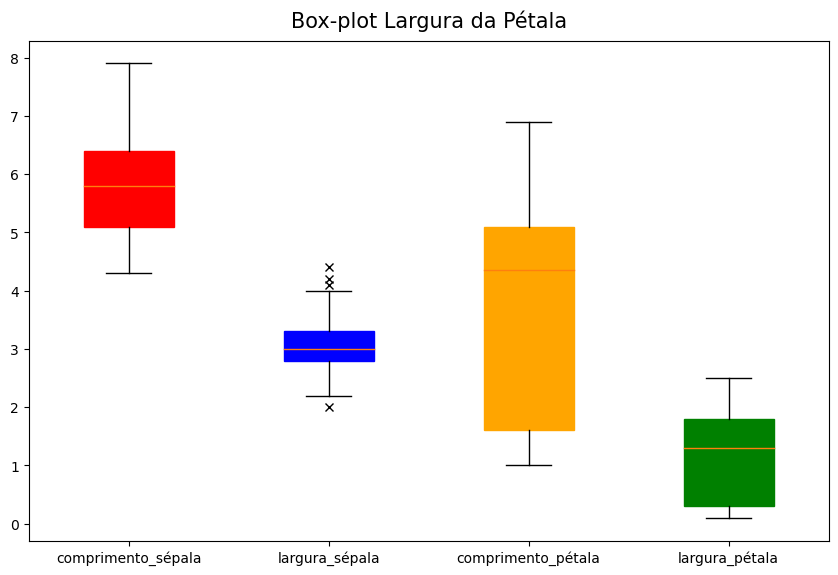

In [85]:
fig = plt.figure(figsize=(8,5))
eixo = fig.add_axes([0,0,1,1])
cores = ['r', 'b', 'orange', 'g']

caixas = eixo.boxplot(df.drop('espécie', axis=1).values, patch_artist=True)
eixo.set_title('Box-plot Largura da Pétala', fontsize=15, pad=10)
eixo.set_xticklabels(df.drop('espécie', axis=1).columns)

# Cores
for caixa, cor in zip(caixas['boxes'], cores):
    caixa.set(color=cor)
    
# Outliers (x)
for outlier in caixas['fliers']:
    outlier.set(marker='x', markersize=6)

# Aula 05
## Customizando Histogramas

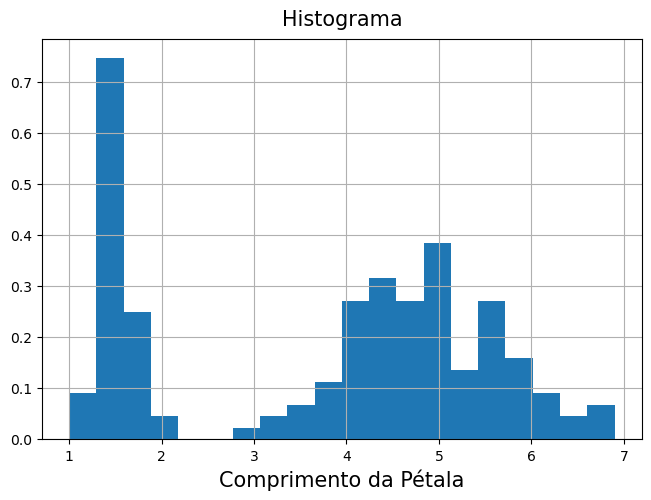

In [86]:
fig = plt.figure(figsize=(6,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(df.comprimento_pétala, bins=20, density=True)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da Pétala', fontsize=15)
eixo.grid(True)

# Escrevendo no Gráfico

Text(4.5, 25, '$mu = 3.76$\n$sigma = 1.76$')

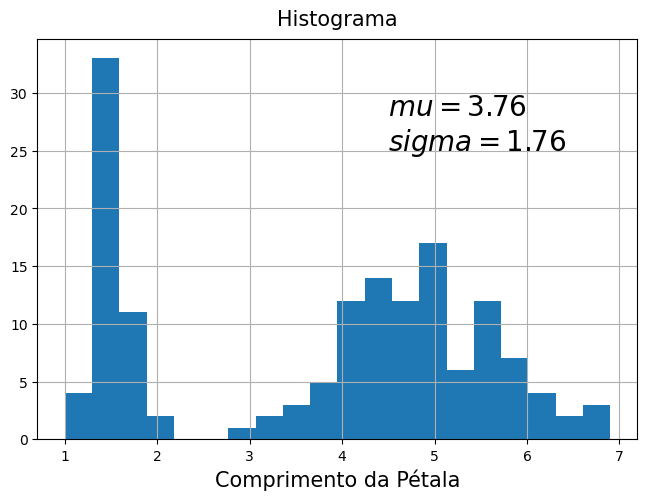

In [87]:

fig = plt.figure(figsize=(6,4))
eixo = fig.add_axes([0,0,1,1])

mu, sigma = df.comprimento_pétala.mean(), df.comprimento_pétala.std()

eixo.hist(df.comprimento_pétala, bins=20)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da Pétala', fontsize=15)
eixo.grid(True)

eixo.annotate(f'$mu = {mu:.2f}$\n$sigma = {sigma:.2f}$',
               xy=(4.5, 25), fontsize=20)

# Marcações da média e mediana

Text(4.449999999999999, 20, 'mediana')

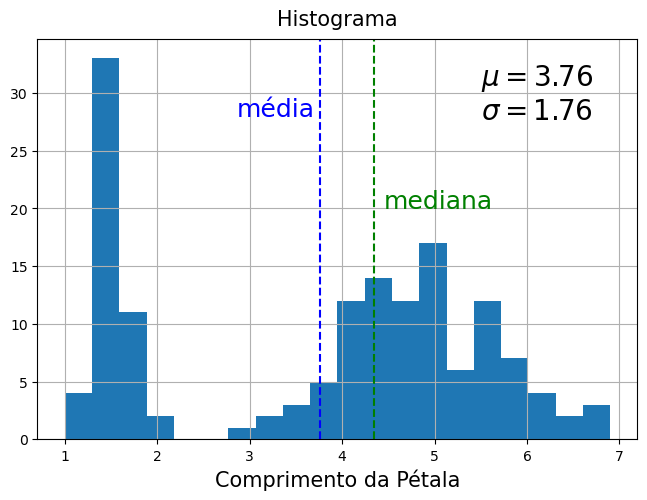

In [88]:
fig = plt.figure(figsize=(6,4))
eixo = fig.add_axes([0,0,1,1])

mu, sigma = df.comprimento_pétala.mean(), df.comprimento_pétala.std()

eixo.hist(df.comprimento_pétala, bins=20)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da Pétala', fontsize=15)
eixo.grid(True)

# mu e sigma
eixo.annotate(f'$\mu = {mu:.2f}$\n$\sigma = {sigma:.2f}$',
               xy=(5.5, 27.7), fontsize=20)

# media
eixo.axvline(mu, color='b', linestyle='--')
eixo.annotate('média', xy=(mu-0.9, 28), fontsize=18, color='b')

# mediana
median = df.comprimento_pétala.median()
eixo.axvline(median, color='g', linestyle='--')
eixo.annotate('mediana', xy=(median+0.1, 20), fontsize=18, color='g')

# Plotando por espécies e salvando

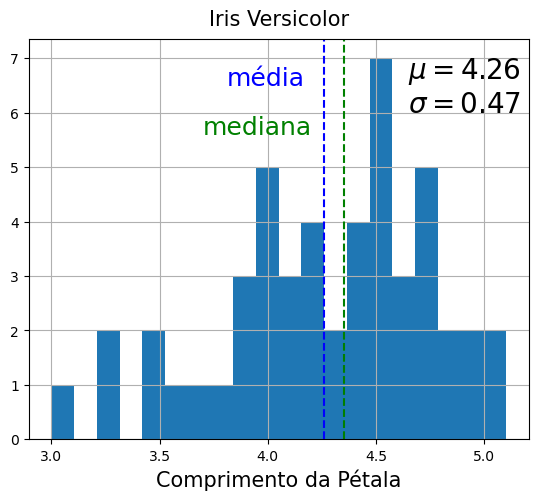

In [153]:
# IRIS VERSICOLOR

fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

df_ive = df[df.espécie == 'Iris-versicolor']

eixo.hist(df_ive.comprimento_pétala, bins=20)
eixo.set_title('Iris Versicolor', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da Pétala', fontsize=15)
eixo.grid(True)

# mu e sigma
mu, sigma = df_ive.comprimento_pétala.mean(), df_ive.comprimento_pétala.std()
eixo.annotate(f'$\mu = {mu:.2f}$\n$\sigma = {sigma:.2f}$',
               xy=(4.65, 6), fontsize=20)

# media
eixo.axvline(mu, color='b', linestyle='--')
eixo.annotate('média', xy=(mu-0.45, 6.5), fontsize=18, color='b')

# mediana
median = df_ive.comprimento_pétala.median()
eixo.axvline(median, color='g', linestyle='--')
eixo.annotate('mediana', xy=(median-0.65, 5.6), fontsize=18, color='g')

# salvando
fig.savefig('graficos/histograma_ive.png', bbox_inches='tight')

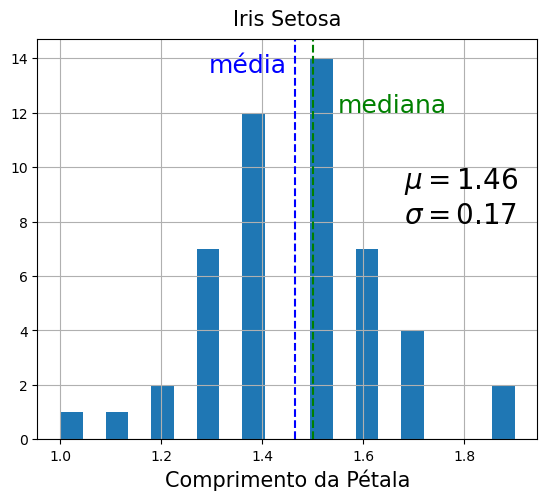

In [154]:
# IRIS SETOSA

fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

df_is = df[df.espécie == 'Iris-setosa']

eixo.hist(df_is.comprimento_pétala, bins=20)
eixo.set_title('Iris Setosa', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da Pétala', fontsize=15)
eixo.grid(True)

# mu e sigma
mu, sigma = df_is.comprimento_pétala.mean(), df_is.comprimento_pétala.std()
eixo.annotate(f'$\mu = {mu:.2f}$\n$\sigma = {sigma:.2f}$',
               xy=(1.68, 7.95), fontsize=20)

# media
eixo.axvline(mu, color='b', linestyle='--')
eixo.annotate('média', xy=(mu-0.17, 13.5), fontsize=18, color='b')

# mediana
median = df_is.comprimento_pétala.median()
eixo.axvline(median, color='g', linestyle='--')
eixo.annotate('mediana', xy=(median+0.05, 12), fontsize=18, color='g')

# salvando
fig.savefig('graficos/histograma_is.png', bbox_inches='tight')

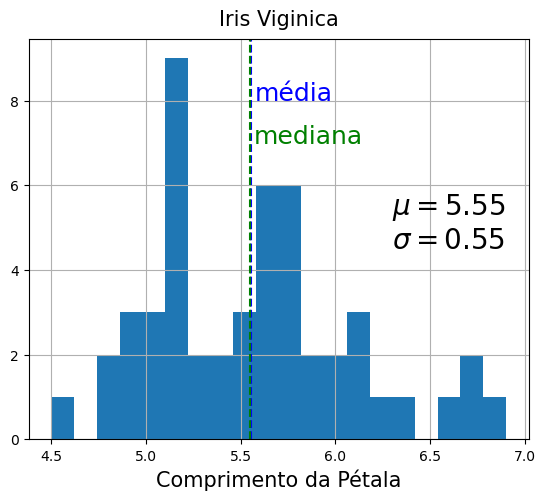

In [146]:
# IRIS VIRGINICA

fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

df_ivi = df[df.espécie == 'Iris-virginica']

eixo.hist(df_ivi.comprimento_pétala, bins=20)
eixo.set_title('Iris Viginica', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da Pétala', fontsize=15)
eixo.grid(True)

# mu e sigma
mu, sigma = df_ivi.comprimento_pétala.mean(), df_ivi.comprimento_pétala.std()
eixo.annotate(f'$\mu = {mu:.2f}$\n$\sigma = {sigma:.2f}$',
               xy=(6.3, 4.5), fontsize=20)

# media
eixo.axvline(mu, color='b', linestyle='--')
eixo.annotate('média', xy=(mu+0.02, 8), fontsize=18, color='b')

# mediana
median = df_ivi.comprimento_pétala.median()
eixo.axvline(median, color='g', linestyle='--')
eixo.annotate('mediana', xy=(median+0.02, 7), fontsize=18, color='g')

# salvando
fig.savefig('graficos/histograma_ivi.png', bbox_inches='tight')

# Juntando os 3 gráficos

In [155]:
from PIL import Image

largura, altura = Image.open('graficos/histograma_is.png').size

combinada = Image.new('RGB', (3*largura, altura))

intervalo = 0

for imagem in map(Image.open, ['graficos/histograma_ivi.png', 'graficos/histograma_is.png', 'graficos/histograma_ive.png']):
    combinada.paste(imagem, (intervalo, 0))
    intervalo += largura
    
combinada.save('graficos/combinada.png')

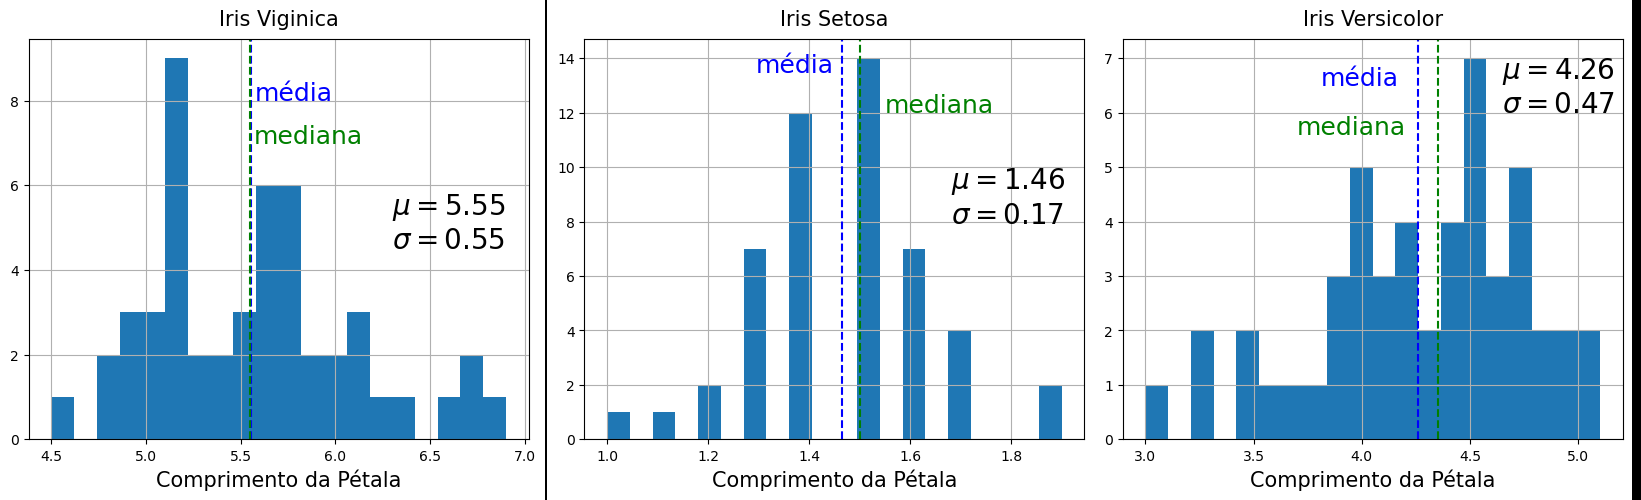

In [156]:
combinada